Importing pandas

In [88]:
import pandas as pd

 Dataset Overview

In [129]:

data = pd.read_csv('Titanic-Dataset.csv')
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
# Checking duplicates 
     #  Data Integrity 
             #   Name  Age Salary 
             #   Ali    30  4000
             #   Ali    30  4000

data.duplicated().sum()
data.drop_duplicates(inplace = True)



In [131]:
# Divide data into numerical and catagorical 
     # for Outlier detection its important for methods that only depend on numerical values and computations
     # for encoding catagorical values 

categorical_columns = [column for column in data.columns if data[column].dtype == 'object']
numerical_columns = [column for column in data.columns if data[column].dtype != "object"]

print(f"Categorical columns : ${categorical_columns}")
print(f"Numerical columns : ${numerical_columns}")



Categorical columns : $['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns : $['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [132]:
# Catogarical cloumns are important to get 
# the unique values to see if i can transform them 
# to numerical values and understand the data 
data[categorical_columns].nunique()


Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [133]:
# Missing data 
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [134]:
# sum of missings and the percentage 

# Use dropna() when:

# The missing values are few (e.g., <5% of data).

# They don’t carry important information.

# Filling would introduce bias or false data.

# Use fillna() when:

# You can estimate a reasonable replacement.

# The missing data percentage is high (dropping would lose too much).

# The column is numerical, and filling doesn’t distort the distribution much.
data['Cabin'].isnull().sum()
data['Cabin'].isnull().mean()
# print(f'with missing values : ${data['Age']}')
# data['Age'].fillna(data['Age'].mean(),inplace = True)
# print(f'without missing values : ${data['Age']}')

## drop null values
print(f'without droping null values : ${data['Age']}')
data.dropna(subset=['Age'],inplace = True)
print(f'After droping null values : ${data['Age']}')

# Filling with the most frequent data 
data['Age'].fillna(data['Age'].mode()[0],inplace = True) 


without droping null values : $0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
After droping null values : $0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64


/tmp/ipykernel_42247/993133265.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mode()[0],inplace = True)


In [135]:
data1 = data.drop(columns=['Name','Ticket','Cabin'])
data1['Embarked'].isnull().sum()


np.int64(2)

In [136]:
data1.dropna(subset=['Embarked'],inplace=True)
data1['Embarked'].isnull().sum()

np.int64(0)

In [137]:
data1['Age'].fillna(data1['Age'].mean(),inplace = True)
data1


/tmp/ipykernel_42247/582498722.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['Age'].fillna(data1['Age'].mean(),inplace = True)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


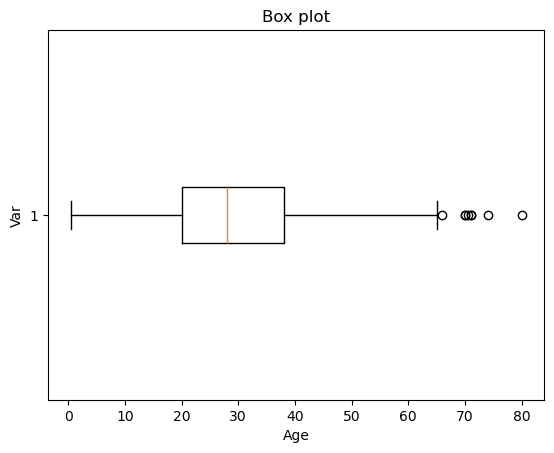

In [139]:
import matplotlib.pyplot as plt
data
data.dropna(subset=['Embarked'], inplace=True)
plt.boxplot(data1['Age'],vert = False)
plt.ylabel('Var')
plt.xlabel('Age')
plt.title("Box plot")
plt.show()



Lower Bound : 0.6562268959821687
Upper Bound : 58.62795849727625


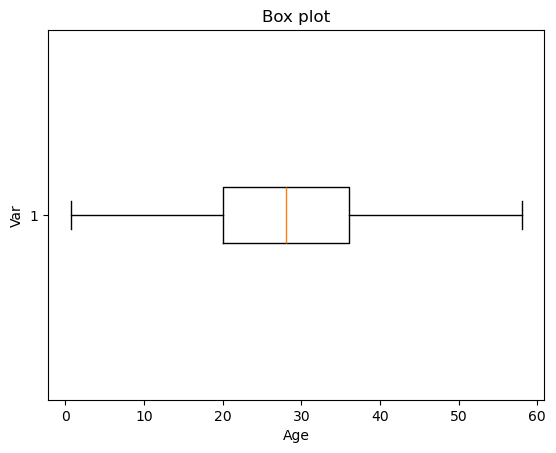

Lower Bound : 2.5458666661898874
Upper Bound : 54.051355556032334


In [147]:
mean = data1['Age'].mean()
std = data1['Age'].std()

lower_bound = mean - 2*std
upper_bound = mean + 2*std

data2 = data1[(data['Age'] >= lower_bound) & (data1['Age'] <= upper_bound)]
data2.isnull().sum()


print('Lower Bound :', lower_bound)
print('Upper Bound :', upper_bound)

plt.boxplot(data2['Age'],vert = False)
plt.ylabel('Var')
plt.xlabel('Age')
plt.title("Box plot")
plt.show()


mean = data2['Age'].mean()
std = data2['Age'].std()

lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

print('Lower Bound :', lower_bound)
print('Upper Bound :', upper_bound)

data3 = data2[(data2['Age'] >= lower_bound) & (data2['Age'] <= upper_bound)]



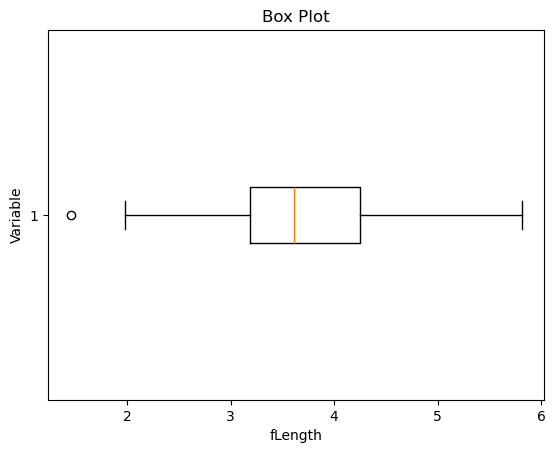

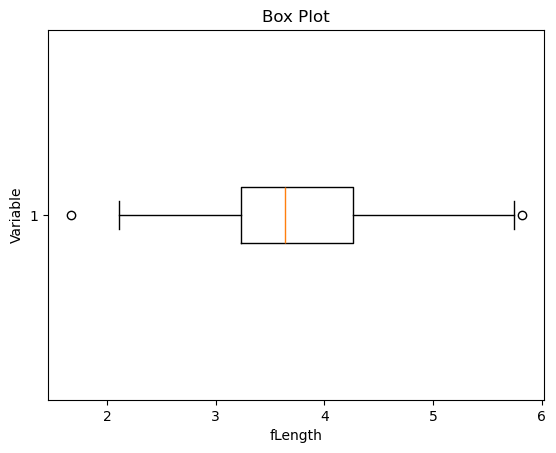

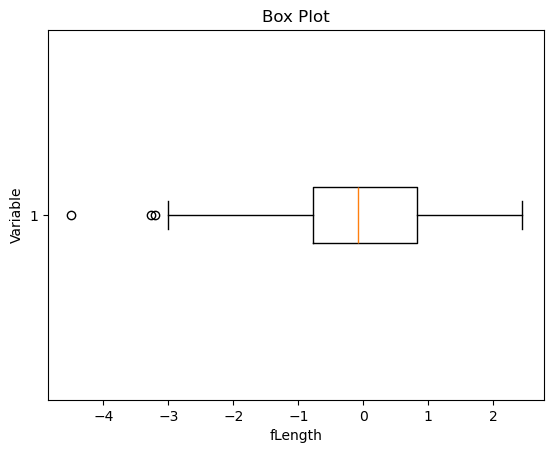

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

transform = FunctionTransformer(func=np.log1p)

telescope_data = pd.read_csv("telescope_data.csv")
telescope_data.drop('Unnamed: 0',axis = 1 , inplace = True)

telescope_data2 = telescope_data.copy(deep=True)
telescope_data3 = telescope_data.copy(deep=True)
telescope_data4 = telescope_data.copy(deep=True)

# telescope_data2['fLength'] = np.log(telescope_data['fLength'])
telescope_data['fLength'] = np.log(telescope_data['fLength'])


plt.boxplot(telescope_data['fLength'], vert=False)
plt.ylabel('Variable')
plt.xlabel('fLength')
plt.title('Box Plot')
plt.show()
telescope_data2['fLength'] = transform.fit_transform(telescope_data2['fLength'])
plt.boxplot(telescope_data2['fLength'], vert=False)
plt.ylabel('Variable')
plt.xlabel('fLength')
plt.title('Box Plot')
plt.show()
pt = PowerTransformer(method='yeo-johnson')

# Transform the fLength column (reshape for 2D input)
X_transformed = pt.fit_transform(telescope_data3[['fLength']])

# Convert back to DataFrame with the same column name
X_transformed = pd.DataFrame(X_transformed, columns=['fLength'])

plt.boxplot(X_transformed['fLength'], vert=False)
plt.ylabel('Variable')
plt.xlabel('fLength')
plt.title('Box Plot')
plt.show()

scaler  = RobustScaler()
dataset['fLength'] = scaler.fit_transform(dataset[['fLength']])
# len([value for value in telescope_data['fLength'].values if value>150])

